In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
from datetime import timedelta
sns.set_style("whitegrid")

df=pd.read_excel("ml_project1_data.xlsx", index_col=0)
display(df.head(3))
print(df.info(), "\nResponse rate: {}%".format(round(100*df["Response"].mean(), 2)))

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4           22

In [2]:
## Delete Constant Columns
df.drop(["Z_CostContact", "Z_Revenue"], axis=1,inplace=True)

## Change Dt_Customer to amount of Days till today
datetimeFormat = '%Y-%m-%d'
today = "2019-04-12"
days_customer = []

for i in df["Dt_Customer"]:
    
    diff = datetime.datetime.strptime(today, datetimeFormat) - datetime.datetime.strptime(i, datetimeFormat)
    days_customer.append(diff.days)

df["DaysCustomer"] = days_customer
df.drop(["Dt_Customer"], axis=1, inplace=True)

## Convert the columns that are categorical, but still are classified as numerical to an object.
df["Kidhome"] = df["Kidhome"].astype("object")
df["Teenhome"] = df["Teenhome"].astype("object")
df["AcceptedCmp3"] = df["AcceptedCmp3"].astype("object") 
df["AcceptedCmp1"] = df["AcceptedCmp1"].astype("object") 
df["AcceptedCmp2"] = df["AcceptedCmp2"].astype("object") 
df["AcceptedCmp4"] = df["AcceptedCmp4"].astype("object") 
df["AcceptedCmp5"] = df["AcceptedCmp5"].astype("object") 
df["Complain"] = df["Complain"].astype("object") 

In [3]:
##drop categories that are weird

errors_dict = {"Marital_Status": "YOLO", "Marital_Status": "Alone", "Marital_Status": "Absurd"}
for key, value in errors_dict.items():
    df = df[df[key] != value]

In [19]:
## Deal with Nan Values

df = df.dropna(subset = ["Income"])

In [22]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysCustomer
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,2411
2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,1861
4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,2060
6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,1887
5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,1909


In [23]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
DaysCustomer           0
dtype: int64

### Outliers

In [8]:
df_num = df.select_dtypes(include=["number"]).drop(["Response"], axis = 1)

In [9]:
df_num.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,DaysCustomer
ID,,,,,,,,,,,,,,,
5524,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,2411
2174,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,1861
4141,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,2060
6182,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,1887
5324,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,1909


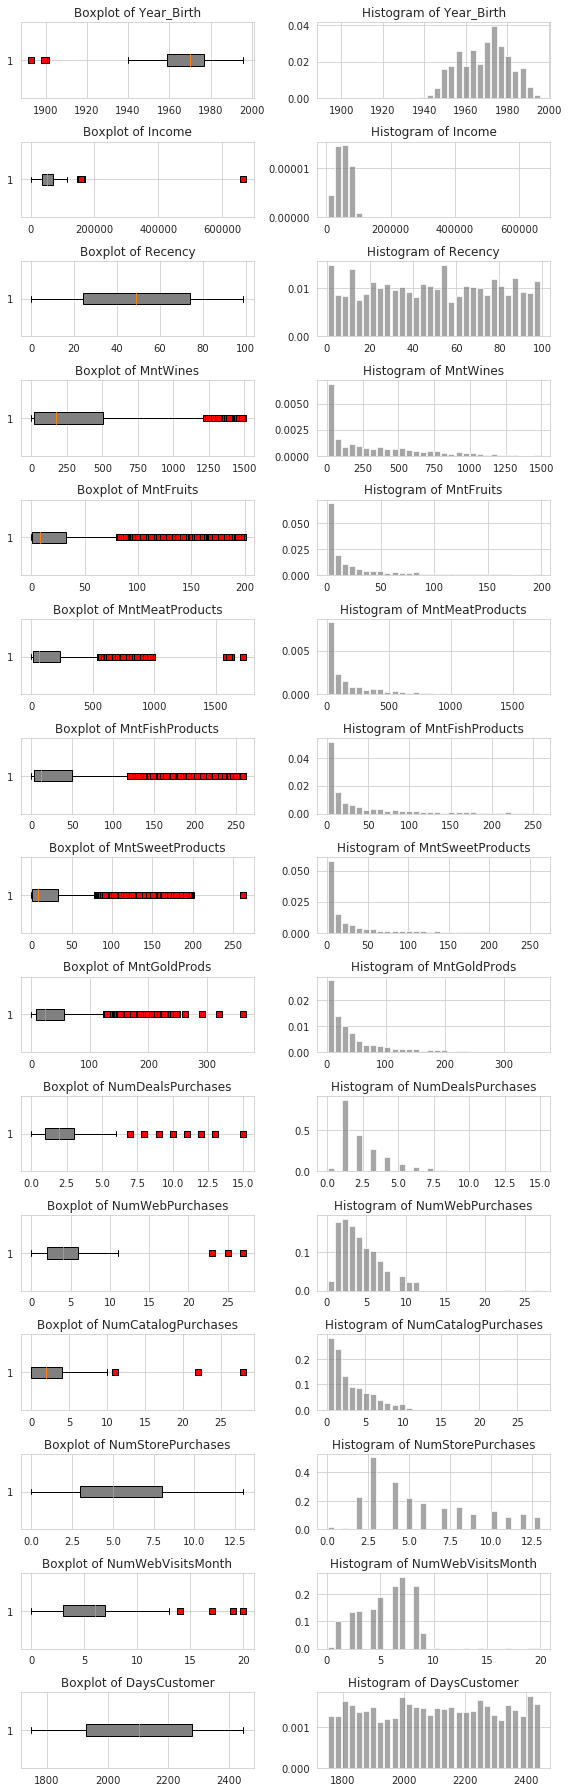

In [10]:
def univariate_outlier_id_plot(df):
    color = "gray"
    fig = plt.figure(figsize=(8, 25))
    i=1
    for feature in df:        
        if feature == "Income":
          ser = df[feature].copy()
          ser.dropna(inplace=True)
        else:
          ser = df[feature]
        ax = fig.add_subplot(df.shape[1], 2, i)
        box = ax.boxplot(ser, flierprops=dict(markerfacecolor='r', marker='s'), vert=False, patch_artist=True)
        box['boxes'][0].set_facecolor(color)
        ax.set_title("Boxplot of "+feature)
        ax = fig.add_subplot(df.shape[1], 2, i+1)
        ax.hist(ser, density=1, bins=30, color=color, alpha=0.7, rwidth=0.85)
        ax.set_title("Histogram of "+feature)
        i+=2

    plt.tight_layout()
    plt.show()
    
univariate_outlier_id_plot(df_num)

In [13]:
def filter_by_std(series_, n_stdev=3.0, return_thresholds=False):
    mean_, stdev_ = series_.mean(), series_.std()
    cutoff = stdev_ * n_stdev
    lower_bound, upper_bound = mean_ - cutoff, mean_ + cutoff
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]
    
def filter_by_iqr(series_, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(series_, 25), np.percentile(series_, 75)
    iqr = q75-q25
    
    cutoff = iqr*k
    lower_bound, upper_bound = q25-cutoff, q75+cutoff
    
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

In [11]:
def plot_filter_by_stdev(df, feature, stdev_tuple=(3.0, 2.0), colors=("red", "yellow")):
    sns.distplot(df[feature], kde=False, color="gray")
    lower_bound_1, upper_bound_1 = filter_by_std(df[feature], n_stdev=stdev_tuple[0], return_thresholds=True)
    lower_bound_2, upper_bound_2 = filter_by_std(df[feature], n_stdev=stdev_tuple[1], return_thresholds=True)
    if df[feature].min()<=0:
        plt.axvspan(min(df[feature][df[feature] < lower_bound_1], default=df[feature].min()), lower_bound_1, alpha=0.2, color=colors[0])
        plt.axvspan(min(df[feature][df[feature] < lower_bound_2], default=df[feature].min()), lower_bound_1, alpha=0.2, color=colors[1])
    plt.axvspan(upper_bound_1, max(df[feature][df[feature] > upper_bound_1], default=df[feature].max()), alpha=0.2, color=colors[0])
    plt.axvspan(upper_bound_2, max(df[feature][df[feature] > upper_bound_2], default=df[feature].max()), alpha=0.2, color=colors[1])
    plt.title("Outliers in {} by {} and {} standard deviations:\n".format(feature, stdev_tuple[0], stdev_tuple[1]))
    
def plot_filter_by_iqr(df, feature, k_tuple=(1.7, 1.2), colors=("red", "yellow")):
    sns.distplot(df[feature], kde=False, color="gray")
    lower_bound_1, upper_bound_1 = filter_by_iqr(df[feature], k=k_tuple[0], return_thresholds=True)
    lower_bound_2, upper_bound_2 = filter_by_iqr(df[feature], k=k_tuple[1], return_thresholds=True)
    if df[feature].min()<=0:
        plt.axvspan(min(df[feature][df[feature] < lower_bound_1], default=df[feature].min()), lower_bound_1, alpha=0.2, color=colors[0])
        plt.axvspan(min(df[feature][df[feature] < lower_bound_2], default=df[feature].min()), lower_bound_1, alpha=0.2, color=colors[1])
    plt.axvspan(upper_bound_1, max(df[feature][df[feature] > upper_bound_1], default=df[feature].max()), alpha=0.2, color=colors[0])
    plt.axvspan(upper_bound_2, max(df[feature][df[feature] > upper_bound_2], default=df[feature].max()), alpha=0.2, color=colors[1])
    plt.title("Outliers in {} by {} and {} k in IQR:\n".format(feature, k_tuple[0], k_tuple[1]))

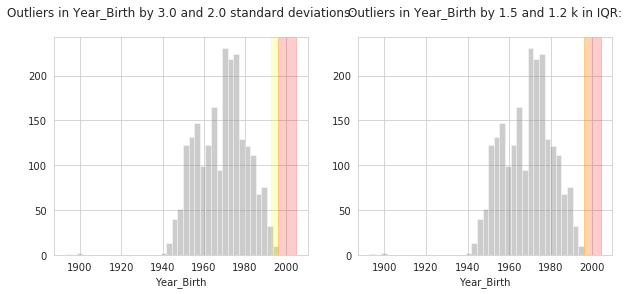

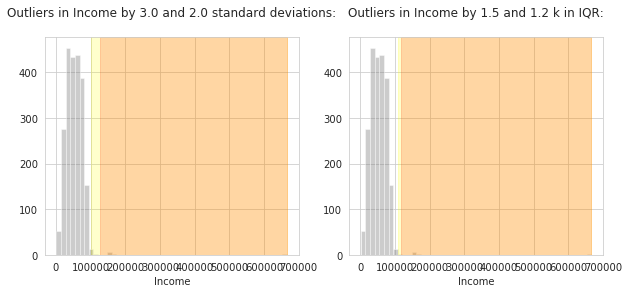

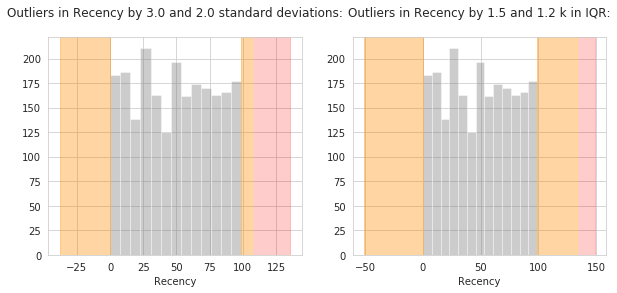

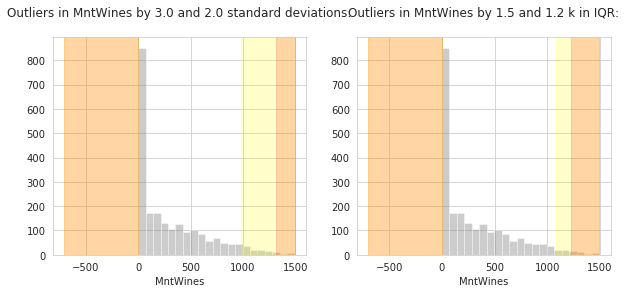

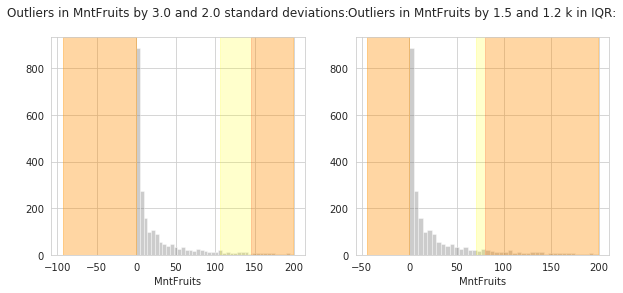

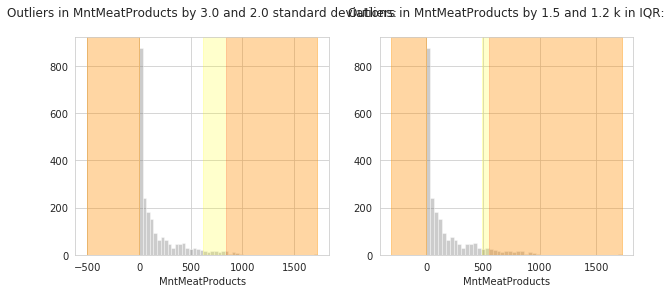

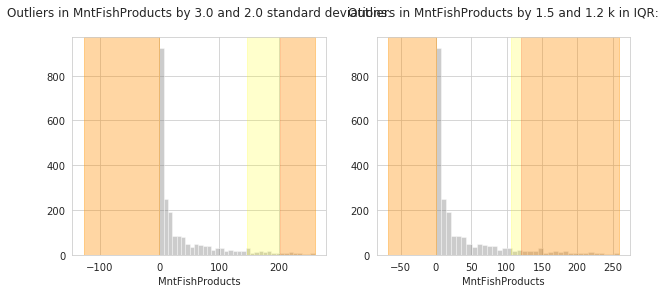

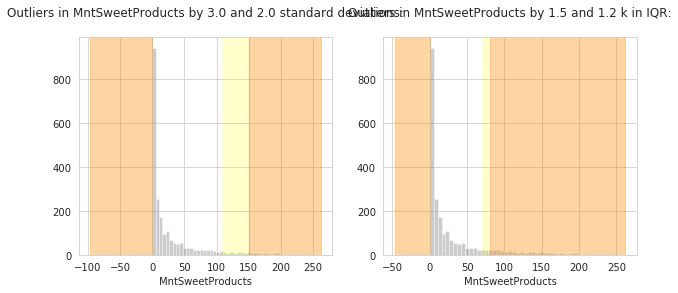

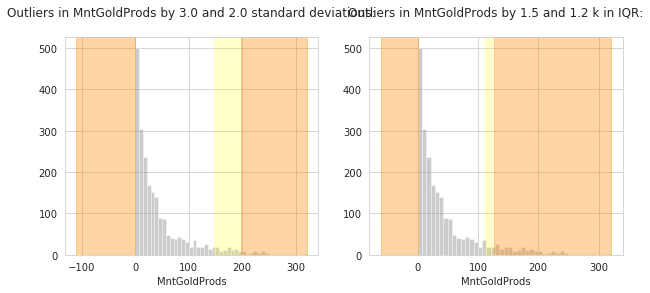

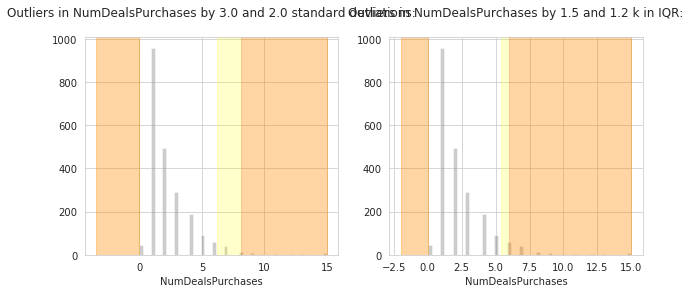

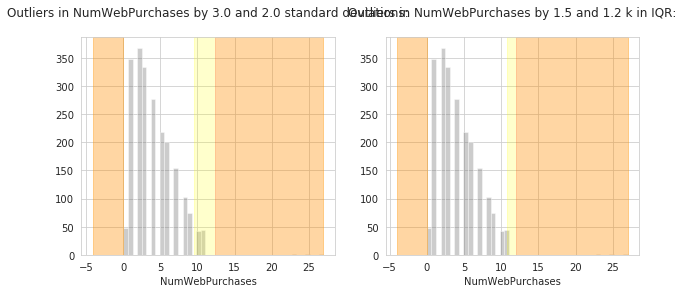

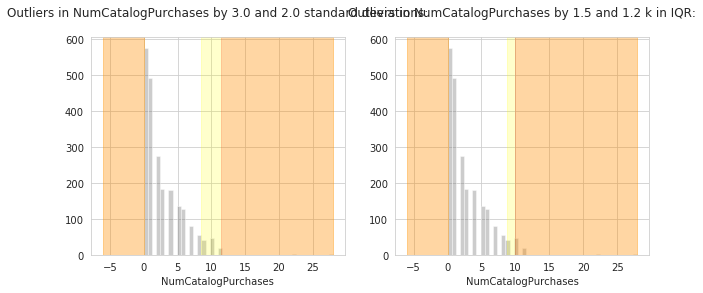

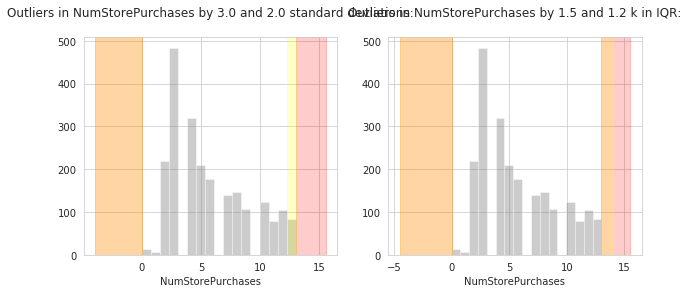

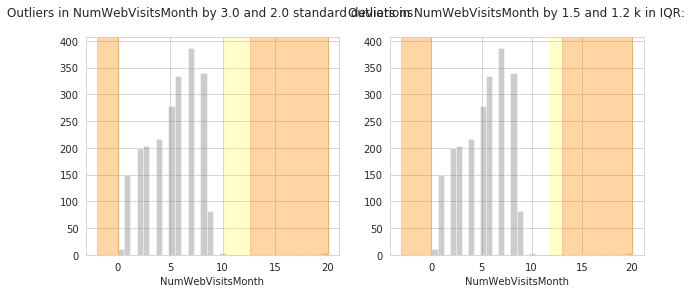

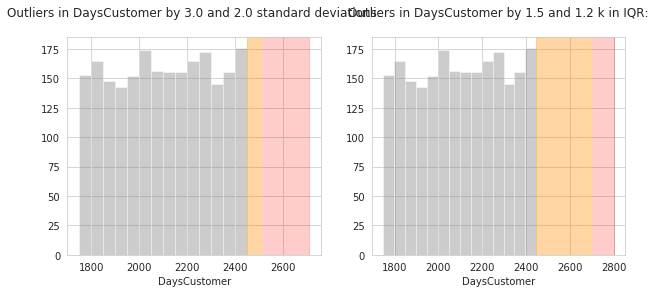

In [24]:
for i in df_num:

    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plot_filter_by_stdev(df, i, stdev_tuple=(3.0, 2.0), colors=("red", 'yellow'))

    plt.subplot(122)
    plot_filter_by_iqr(df, i, k_tuple=(1.5, 1.2), colors=("red", 'yellow'))